# Neural Network - Code

In diesem Notebook schauen wir uns das `Fully-Connected Neural Network` Modell am MNIST Datensatz an.
Wir verwenden dazu `tensorflow`, die Deep Learning Python Library von Google.

## Setup

Setup Code muss *nicht* verstanden werden.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import L2
from tensorflow.keras import layers, activations, Sequential, losses


In [3]:
def plot_images(data, nrows=18, ncols=18):
    """
    Plot images with or without original data.
    :param data: Data to plot
    :param nrows: number of rows
    :param ncols: number of columns
    """
    data = data.reshape(data.shape[0], 8, 8)
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    for ax, image in zip(axes.flatten(), data):
        ax.set_axis_off()
        ax.imshow(image, cmap='gray')

In [4]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [5]:
def plot_confusion_matrix(y_true: any, y_pred: any):
    """
        Takes true and predicted labels (arrays) as input. Based on this, calculates and plots a confusion matrix.
    """
    labels = np.unique(y_true)
    fig = plt.figure(figsize=(len(labels), len(labels)))
    ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels, normalize='all'),
        display_labels=labels
    ).plot(ax=fig.gca(), cmap="BuPu", xticks_rotation='vertical', include_values=True)
    plt.show()

## Datensatz - MNIST

MNIST Daten sind Schwarz-Weiss Bilder von den Zahlen von 0 bis 9.
Es sind insgesamt 1797 Bilder mit 8 * 8 Pixel (`X_data`). Zu jedem Bild haben wir ein Label, welche Zahl auf dem Bild abgebildet ist (`y_data`).

In [6]:
data = load_digits()  # Load MNIST data set
X_data, y_data = data.images, data.target

print(X_data.shape)
print(y_data.shape)

(1797, 8, 8)
(1797,)


Wir visualisieren hier ein paar MNIST-Bilder, um einen Eindruck der Daten zu erhalten.

MNIST examples from dataset


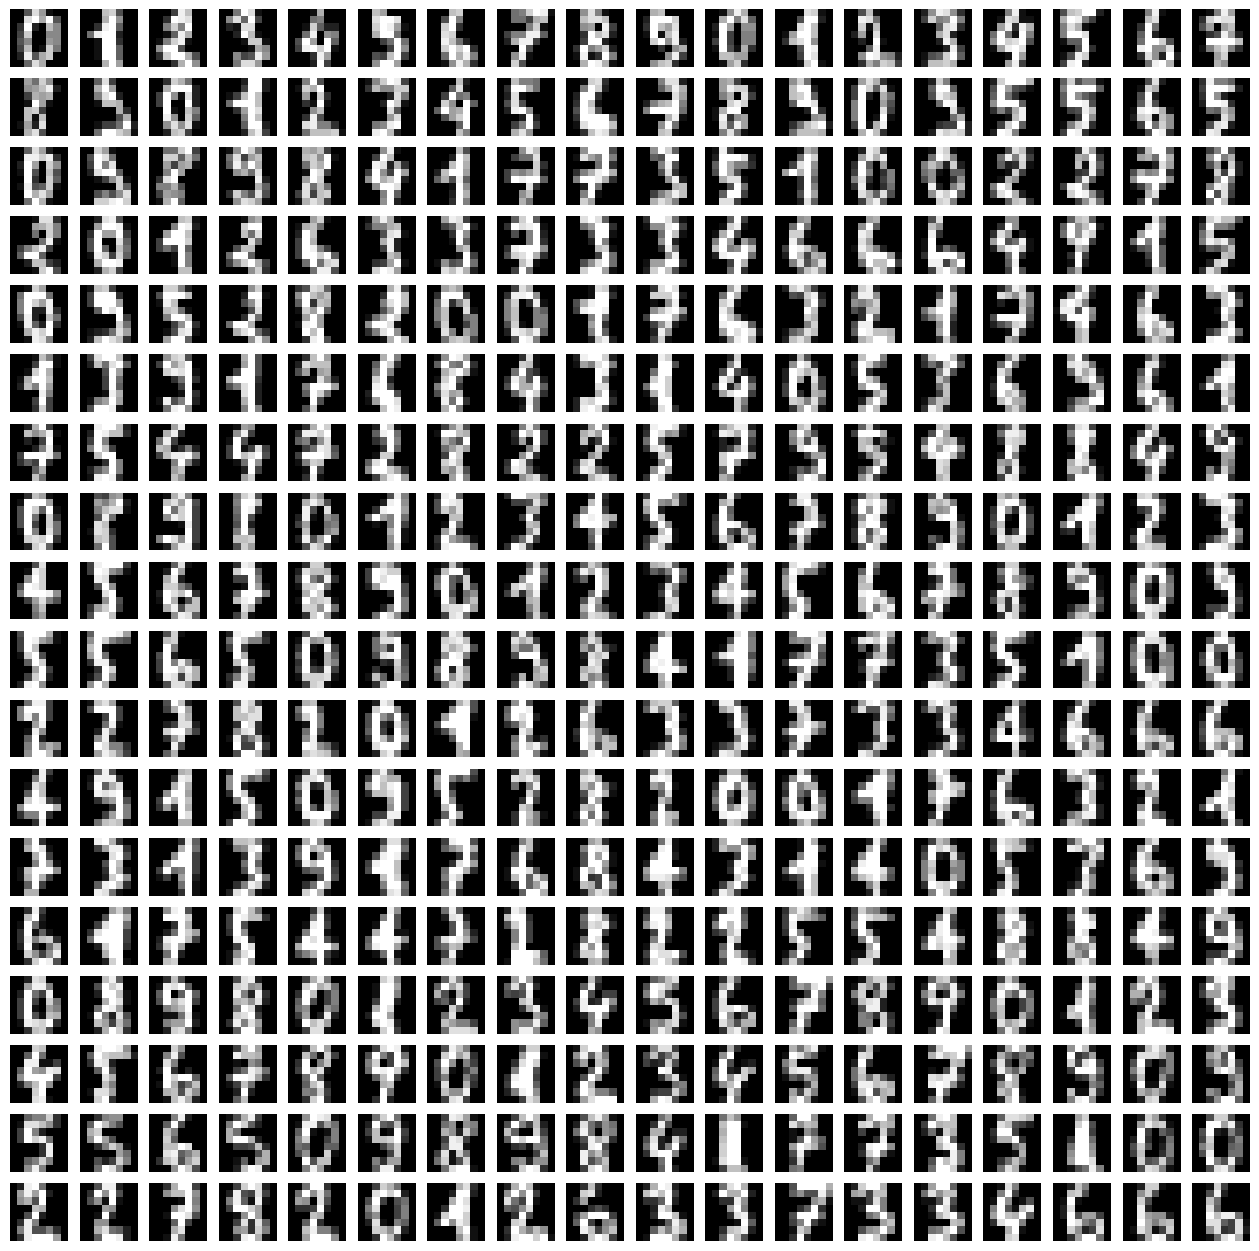

In [7]:
print("MNIST examples from dataset")
plot_images(X_data)
plt.show()

## Neural Network

Nun trainieren wir ein Neurales Netzwerk auf diesen Daten.

Als erstes teilen wir die Daten in `Train Set` und `Validation Set` auf.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

Das hier verwendete Neurale Netzwerk hat 4 Layers:
* Einen Input Layer
* Zwei Hidden Layers
* Einen Output Layer

Der Input Layer ist ein 8 Pixel mal 8 Pixel Bild bzw. 2D-Array. Als erstes `Reshapen` wir diesen 2D-Array mit 8 mal 8 Dimensionen zu einem 1D-Array mit 64 Dimensionen, weil das Feedforward Neural Network erwartet die Inputs als 1D-Array.
Dann kommt das eigentliche Netzwerk.
Der Input Layer ist dieser 1D-Array mit 64 Neuronen.
Dann kommt ein Hidden Layer (`hidden_layer_1`) mit 128 Neuronen.
Dann kommt ein Hidden Layer (`hidden_layer_2`) mit 64 Neuronen.
Dann kommt der Output Layer (`output_layer`) mit 10 Neuronen (weil wir 10 Klassen haben).
Die Hidden Layers haben alle die Aktivierungsfunktion `ReLU`.
Der Output Layer hat die Aktivierungsfunktion `softmax` (hier `linear` mit  `losses.SparseCategoricalCrossentropy(from_logits=True)` als Kostenfunktion, was indirekt dem Softmax entspricht).
Das Neurale Netzwerk wird mit Batch Gradient Descent (`sgd`) trainiert und nach der Maximum Liklihood Kostenfunktion optimiert (`SparseCategoricalCrossentropy`). Zudem wollen wir die Performanz vom Modell mit der Kostenfunktion `accuracy` messen.

`nn.summary()` gibt uns Informationen zur Architektur vom Netzwerk. Wir finden unsere Layers wieder und sehen wie viele Parameter (Verbindungen) pro Layer tatsächlich vorhanden sind.

In [9]:
nn = Sequential([
    layers.InputLayer(input_shape=(8,8), name='input_layer'),
    layers.Reshape(target_shape=(8*8,), name= 'reshape_layer'),
    layers.Dense(128, activation=activations.relu, kernel_regularizer=L2(0.01),  name='hidden_layer_1', ),
    layers.Dense(64, activation=activations.relu, kernel_regularizer=L2(0.01),  name='hidden_layer_2', ),
    layers.Dense(10, activation=activations.linear, kernel_regularizer=L2(0.01), name='output_layer'),
])
nn.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print(nn.summary())

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_layer (Reshape)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

None


Bis jetzt haben wir nur das Netzwerk aufgebaut.

Nun fitten wir es noch mit den Daten. Dazu müssen wir die `batch_size` für Batch Gradient Descent angeben und wie oft es über die gesamten Daten iterieren soll (`epochs`).
Zudem geben wir hier die Validation Daten an. Dann reportet und Tensorflow während dem Training die Performanz auf dem `Validation Set`.
Nach dem Training visualisieren wir die `Learning Curve`, die uns zeigt, wie sich die `accuracy` vom Netzwerk über die Epochen entwickelt.

In [10]:
history = nn.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2271 - loss: 5.4413 - val_accuracy: 0.5556 - val_loss: 3.1383
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6686 - loss: 2.8587 - val_accuracy: 0.8200 - val_loss: 2.4995
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8393 - loss: 2.4113 - val_accuracy: 0.8533 - val_loss: 2.3385
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8826 - loss: 2.2535 - val_accuracy: 0.8844 - val_loss: 2.2196
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9092 - loss: 2.1649 - val_accuracy: 0.9133 - val_loss: 2.1511
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9276 - loss: 2.1006 - val_accuracy: 0.9244 - val_loss: 2.1195
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9253 - loss: 2.0802 - val_accuracy: 0.9156 - val_loss: 2.0781
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9436 - loss: 2.0386 - val_accuracy: 0.9333 - v

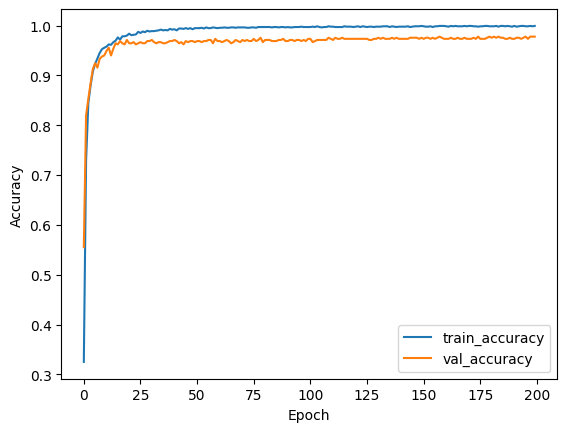

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.9777777777777777


In [11]:
plot_history(history)

y_val_hat_prob = nn.predict(X_val)
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val))